# **Modules imports**

In [3]:
import numpy as np

import keras
from keras import layers

import matplotlib.pyplot as plt

# **MNIST dataset**

In [4]:
# Data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X, Y), (x, y) = keras.datasets.mnist.load_data()
x_train, y_train, x_test, y_test = X, Y, x, y

In [5]:
print (x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [6]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print (y_train[0])

5


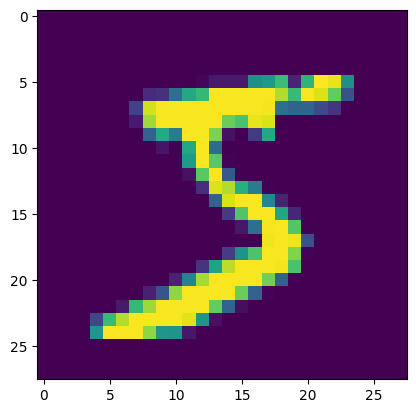

In [6]:
plt.imshow(x_train[0])

In [12]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print (y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **Create a Neural Network: Sequential**

In [8]:
network = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(4, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")])

# **Create a Neural Network: Model Class**

In [9]:
input = keras.Input(shape=(28,28))
x1 = keras.layers.Flatten()(input)
x2 = keras.layers.Dense(8, activation="tanh")(x1)
x3 = keras.layers.Dense(4, activation="tanh")(x2)
output = keras.layers.Dense(10, activation="softmax")(x3)

network = keras.Model(inputs=input, outputs=output)

In [10]:
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 6280      
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 6366 (24.87 KB)
Trainable params: 6366 (24.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
network.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# **Train Network**

In [12]:
network.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 6s 11ms/step - loss: 1.2605 - accuracy: 0.6390
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.6494 - accuracy: 0.8251
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4814 - accuracy: 0.8868
Epoch 4/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4276 - accuracy: 0.8964
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.4053 - accuracy: 0.9006
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.3885 - accuracy: 0.9039
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.3764 - accuracy: 0.9067
Epoch 8/10
118/118 [==============================] - 1s 8ms/step - loss: 0.3628 - accuracy: 0.9095
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.3584 - accuracy: 0.9114
Epoch 10/10
118/118 [==============================] - 1s 7ms/step - loss: 0.3514 - accuracy

# **Test Network**

In [13]:
network.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.9037


[0.3977714478969574, 0.9036999940872192]

In [14]:
 predictions = network.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
print (x_test.shape, y_test.shape, predictions.shape)

(10000, 28, 28) (10000, 10) (10000, 10)


In [16]:
for n in predictions[0]:
  print (round(n, 3))

0.0
0.0
0.0
0.009
0.0
0.01
0.0
0.979
0.0
0.001


In [17]:
idx = 0
print (np.argmax(y_test[idx]), np.argmax(predictions[idx]))

7 7


# **Train larger Network**

In [18]:
network_large = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="tanh"),
    keras.layers.Dense(2048, activation="tanh"),
    keras.layers.Dense(1024, activation="tanh"),
    keras.layers.Dense(512, activation="tanh"),
    keras.layers.Dense(256, activation="tanh"),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(16, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")])

network_large.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

network_large.fit(x_train, y_train, epochs=30, batch_size=512)

Epoch 1/30
118/118 [==============================] - 5s 16ms/step - loss: 0.5918 - accuracy: 0.8806
Epoch 2/30
118/118 [==============================] - 2s 15ms/step - loss: 0.2531 - accuracy: 0.9455
Epoch 3/30
118/118 [==============================] - 2s 17ms/step - loss: 0.1793 - accuracy: 0.9577
Epoch 4/30
118/118 [==============================] - 2s 16ms/step - loss: 0.1407 - accuracy: 0.9657
Epoch 5/30
118/118 [==============================] - 2s 15ms/step - loss: 0.1239 - accuracy: 0.9692
Epoch 6/30
118/118 [==============================] - 2s 15ms/step - loss: 0.1020 - accuracy: 0.9740
Epoch 7/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0885 - accuracy: 0.9770
Epoch 8/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0800 - accuracy: 0.9785
Epoch 9/30
118/118 [==============================] - 2s 16ms/step - loss: 0.0690 - accuracy: 0.9819
Epoch 10/30
118/118 [==============================] - 2s 17ms/step - loss: 0.0627 - accura

In [19]:
network.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.9037


[0.3977714478969574, 0.9036999940872192]

# **Train with Validation split**

In [20]:
network_large = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="tanh"),
    keras.layers.Dense(2048, activation="tanh"),
    keras.layers.Dense(1024, activation="tanh"),
    keras.layers.Dense(512, activation="tanh"),
    keras.layers.Dense(256, activation="tanh"),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dense(64, activation="tanh"),
    keras.layers.Dense(32, activation="tanh"),
    keras.layers.Dense(16, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")])

network_large.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

h = network_large.fit(x_train, y_train, epochs=30, batch_size=512, validation_split=0.1)

Epoch 1/30
106/106 [==============================] - 5s 21ms/step - loss: 0.6297 - accuracy: 0.8764 - val_loss: 0.3218 - val_accuracy: 0.9493
Epoch 2/30
106/106 [==============================] - 2s 17ms/step - loss: 0.2849 - accuracy: 0.9424 - val_loss: 0.2184 - val_accuracy: 0.9542
Epoch 3/30
106/106 [==============================] - 2s 20ms/step - loss: 0.2011 - accuracy: 0.9556 - val_loss: 0.1554 - val_accuracy: 0.9650
Epoch 4/30
106/106 [==============================] - 2s 18ms/step - loss: 0.1549 - accuracy: 0.9633 - val_loss: 0.1285 - val_accuracy: 0.9712
Epoch 5/30
106/106 [==============================] - 2s 18ms/step - loss: 0.1214 - accuracy: 0.9710 - val_loss: 0.1415 - val_accuracy: 0.9658
Epoch 6/30
106/106 [==============================] - 2s 17ms/step - loss: 0.1103 - accuracy: 0.9723 - val_loss: 0.1170 - val_accuracy: 0.9715
Epoch 7/30
106/106 [==============================] - 2s 17ms/step - loss: 0.0898 - accuracy: 0.9772 - val_loss: 0.1100 - val_accuracy: 0.9715

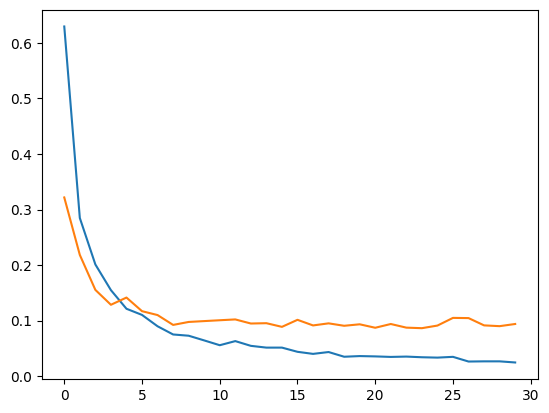

In [21]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()

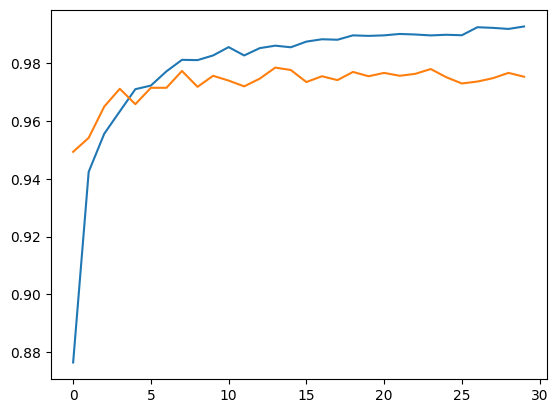

In [22]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()

# **Inject noise**

In [23]:
# Noise injection function
def stripe_noise(data):
  corrupted = np.zeros(data.shape)
  for ex in range(len(data)):
    ov = np.random.choice([0,1])
    idx = np.random.choice(np.arange(28))
    corrupted[ex] = data[ex]
    if ov == 1: corrupted[ex,idx,:] = 255
    else: corrupted[ex,:,idx] = 255

  return corrupted

In [24]:
x_train_striped = stripe_noise(X)
x_test_striped = stripe_noise(x)

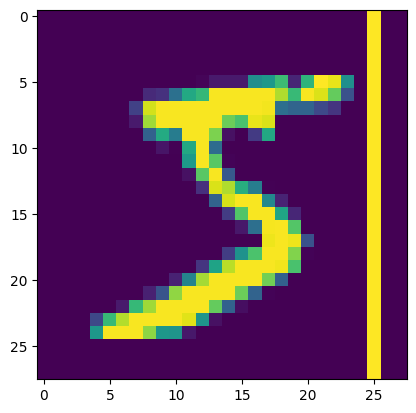

In [25]:
plt.imshow(x_train_striped[0])

# **Alter position**

In [7]:
# Function to pad randomly input examples
def loc_noise(data, rnd=True):
  shifted = np.zeros((data.shape[0],56,56))
  for ex in range(len(data)):
    ud = np.random.randint(0,28)
    lr = np.random.randint(0,28)
    padded = data[ex]
    if rnd: padded = np.pad(data[ex], ((ud, 28-ud), (lr, 28-lr)))
    else: padded = np.pad(data[ex], ((28,0),(28,0)))
    shifted[ex] = padded
  return shifted

In [8]:
x_train_shift = loc_noise(x_train, rnd=False)
x_train_rnd = loc_noise(x_train)
x_test_shift = loc_noise(x_test, rnd=False)
x_test_rnd = loc_noise(x_test)

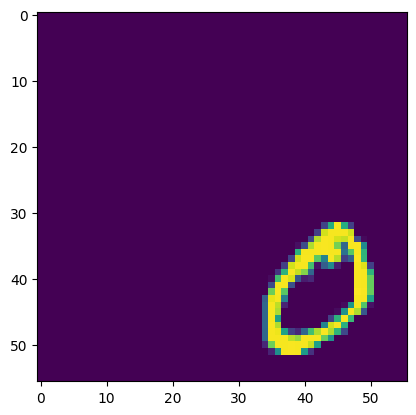

In [9]:
idx = 1
plt.imshow(x_train_shift[idx])

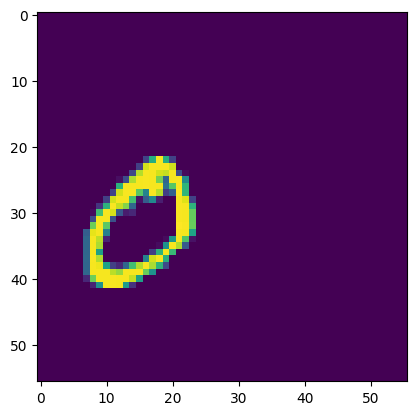

In [10]:
plt.imshow(x_train_rnd[idx])

# **Test on striped data**

In [30]:
network.evaluate(x_test_striped, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.8070 - accuracy: 0.4688


[2.8069982528686523, 0.46880000829696655]

# **Train model for shifted data**

In [31]:
network_shifted = keras.Sequential([
    keras.Input(shape=(56,56)),
    keras.layers.Flatten(),
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(4, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")])

network_shifted.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

network_shifted.fit(x_train_shift, y_train, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 2s 6ms/step - loss: 1.1171 - accuracy: 0.7330
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.5672 - accuracy: 0.8654
Epoch 3/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4856 - accuracy: 0.8802
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.4442 - accuracy: 0.8874
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.4170 - accuracy: 0.8928
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.3977 - accuracy: 0.9003
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.3775 - accuracy: 0.9051
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.3673 - accuracy: 0.9072
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.3565 - accuracy: 0.9101
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.3495 - accuracy: 0.9114

# **Test model on shifted data**

In [32]:
network_shifted.evaluate(x_test_shift, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3860 - accuracy: 0.9038


[0.3860096037387848, 0.9038000106811523]

# **Test model on randomly shifted data**

In [33]:
network_shifted.evaluate(x_test_rnd, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.6253 - accuracy: 0.1258


[5.6252851486206055, 0.1257999986410141]

# **Train and test model on striped data**

In [34]:
network_striped = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(4, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")])

network_striped.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

network_striped.fit(x_train_striped, y_train, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 2s 5ms/step - loss: 1.9037 - accuracy: 0.3142
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 1.6919 - accuracy: 0.3678
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 1.5833 - accuracy: 0.4095
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 1.4897 - accuracy: 0.4573
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 1.5112 - accuracy: 0.4357
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 1.4132 - accuracy: 0.5170
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 1.4708 - accuracy: 0.4774
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 1.3393 - accuracy: 0.5225
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 1.2615 - accuracy: 0.5536
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 1.2963 - accuracy: 0.5304

In [35]:
network_striped.evaluate(x_test_striped, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2487 - accuracy: 0.5357


[1.248737096786499, 0.5357000231742859]

# **Train and test model on randomly shifted data**

In [36]:
network_shifted = keras.Sequential([
    keras.Input(shape=(56,56)),
    keras.layers.Flatten(),
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(4, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")])

network_shifted.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

network_shifted.fit(x_train_rnd, y_train, epochs=10, batch_size=512)

Epoch 1/10
118/118 [==============================] - 2s 6ms/step - loss: 2.2715 - accuracy: 0.1529
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 2.1887 - accuracy: 0.2151
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 2.0789 - accuracy: 0.2649
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 1.9697 - accuracy: 0.2964
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 1.8829 - accuracy: 0.3226
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 1.8101 - accuracy: 0.3470
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 1.7488 - accuracy: 0.3674
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 1.6933 - accuracy: 0.3873
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 1.6430 - accuracy: 0.4038
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 1.5974 - accuracy: 0.4237

In [37]:
network_shifted.evaluate(x_test_rnd, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6262 - accuracy: 0.4177


[1.6262041330337524, 0.41769999265670776]

# **Convolutional network**

In [13]:
network_conv2D = keras.Sequential([
    keras.Input(shape=(56,56,1)),
    keras.layers.Conv2D(8, 7, strides=3, activation="tanh"),
    keras.layers.Conv2D(8, 5, strides=1, activation="tanh"),
    keras.layers.Conv2D(8, 3, strides=1, activation="tanh"),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")])

network_conv2D.summary()

network_conv2D.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

network_conv2D.fit(x_train_rnd, y_train, epochs=10, batch_size=512)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 17, 17, 8)         400       
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 8)         1608      
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 8)         584       
                                                                 
 flatten_1 (Flatten)         (None, 968)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                9690      
                                                                 
Total params: 12282 (47.98 KB)
Trainable params: 12282 (47.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
118/118

In [14]:
network_conv2D.evaluate(x_test_rnd, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.9099


[0.30052605271339417, 0.9099000096321106]